In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from time import sleep
from random import randint

In [2]:
headers = {"Accept-Language": "en-US,en;q=0.5"}

In [3]:
pages = np.arange(1,5000,100)

In [4]:
page = requests.get("https://www.imdb.com/list/ls063676189/?st_dt=&mode=detail&page=1&sort=list_order,asc")
soup = BeautifulSoup(page.text, 'html.parser')
movie_data=soup.findAll('div',attrs={'class':'lister-item-content'})
sleep(randint(2,5))

In [5]:
print(soup)


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Feature Film Top 10000 (Part 1) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/list/ls063676189/" rel="canonical"/>
<meta content="http://www.imdb.com/list/ls063676189/" property="og:url">
<script>
    if (typeof uet == 'f

In [6]:
movie_name =[]
year=[]
rating=[]
metascore=[]
gross_income=[]
votes=[]
time=[]
genre=[]
certificates=[]
descriptions=[]

In [7]:
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint
import numpy as np

# Function to scrape data from a single page
def scrape_page(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    movie_data = soup.findAll('div', attrs={'class': 'lister-item-content'})
    # Process the movie_data as needed
    return movie_data

# Base URL
base_url = "https://www.imdb.com/list/ls063676189/?st_dt=&mode=detail&page={}&sort=list_order,asc"

# Number of pages you want to scrape
num_pages = 50  # Change this to the desired number of pages

# List to store all scraped data
all_movie_data = []

# Loop through pages
for page_number in range(1, num_pages + 1):
    url = base_url.format(page_number)
    movie_data = scrape_page(url)
    all_movie_data.extend(movie_data)

    # Sleep to avoid overwhelming the server
    sleep(randint(2, 5))

# Process all_movie_data as needed, for example, extract relevant information and store in lists
movie_name =[]
year=[]
rating=[]
metascore=[]
gross_income=[]
votes=[]
time=[]
genre=[]
certificates=[]
descriptions=[]

# to store whole data in movie_name
for store in all_movie_data:
    name = store.h3.a.text
    movie_name.append(name)

    year_of_release = store.h3.find('span', class_='lister-item-year text-muted unbold').text.replace('(', '').replace(')', '')
    year.append(year_of_release)
    
    rate = store.find('span', class_='ipl-rating-star__rating').text.replace('\n', '')
    rating.append(rate)
    
    meta = store.find('span', class_='metascore').text if store.find('span',class_ = "metascore") else "Metascore not available"
    metascore.append(meta)
    
    value = store.find_all('span', attrs = {'name': "nv"})
    
    vote = value[0].text
    votes.append(vote)
    
    gross = value[1].text if len(value)>1 else "Gross not available"
    gross_income.append(gross)

    runtime = store.p.find('span', class_='runtime').text.replace(' min', '')
    time.append(runtime)

    genre_element = store.find('span', class_='genre')
    genre_text = genre_element.text.replace('\n', '') if genre_element else "Genre not available"
    genre.append(genre_text)
    
    certificate_element = store.p.find('span', class_='certificate')
    certificate_text = certificate_element.text.replace(' min', '') if certificate_element else "Certificate not available"
    certificates.append(certificate_text)

    description = store.find('p', class_='').text.replace('\n', '')
    descriptions.append(description)
    

In [8]:
m_director_star=[]

In [9]:
for i in range (0,50):
    url='https://www.imdb.com/list/ls063676189/?page='+str(i)
    p=requests.get(url)
    soup=BeautifulSoup(p.text,'html.parser')
    m_director=soup.find_all('p',class_='text-muted text-small')
    for i in m_director:
        m_director_star1=i.text.replace('\n','')
        m_director_star.append(m_director_star1)

In [10]:
m_director=[]
for i in range(1,15000,3):  
    m_director.append(m_director_star[i])

In [11]:
directors = []
stars = []

for i in m_director:
    split_result = i.split('|')
    if len(split_result) == 2:
        director, star = split_result
    elif len(split_result) == 1:
        director = split_result[0]
        star = None 
    
    directors.append(director)
    stars.append(star)

In [12]:
print(directors)

['    Director:Frank Darabont', '    Director:Christopher Nolan', '    Director:Christopher Nolan', '    Director:David Fincher', '    Director:Quentin Tarantino', '    Director:Robert Zemeckis', '    Director:Peter Jackson', '    Directors:Lana Wachowski, Lilly Wachowski', '    Director:Peter Jackson', '    Director:Francis Ford Coppola', '    Director:Christopher Nolan', '    Director:Peter Jackson', '    Director:David Fincher', '    Director:Joss Whedon', '    Director:Ridley Scott', '    Director:Christopher Nolan', '    Director:Quentin Tarantino', '    Director:Christopher Nolan', '    Director:George Lucas', '    Director:Jonathan Demme', '    Director:James Cameron', '    Director:Quentin Tarantino', '    Director:Steven Spielberg', '    Director:Martin Scorsese', '    Director:Steven Spielberg', '    Director:Christopher Nolan', '    Director:Christopher Nolan', '    Director:Irvin Kershner', '    Director:Sam Mendes', '    Director:Gore Verbinski', '    Director:James Camero

In [13]:
director_cons=[]
director_m =[]

for i in directors:
    split_result = i.split(':')
    if len(split_result) == 2:
        director_con, director1 = split_result
    elif len(split_result) == 1:
        director_con = split_result[0]
        director1 = None 
    director_cons.append(director_con)
    director_m.append(director1)

In [14]:
director_m

['Frank Darabont',
 'Christopher Nolan',
 'Christopher Nolan',
 'David Fincher',
 'Quentin Tarantino',
 'Robert Zemeckis',
 'Peter Jackson',
 'Lana Wachowski, Lilly Wachowski',
 'Peter Jackson',
 'Francis Ford Coppola',
 'Christopher Nolan',
 'Peter Jackson',
 'David Fincher',
 'Joss Whedon',
 'Ridley Scott',
 'Christopher Nolan',
 'Quentin Tarantino',
 'Christopher Nolan',
 'George Lucas',
 'Jonathan Demme',
 'James Cameron',
 'Quentin Tarantino',
 'Steven Spielberg',
 'Martin Scorsese',
 'Steven Spielberg',
 'Christopher Nolan',
 'Christopher Nolan',
 'Irvin Kershner',
 'Sam Mendes',
 'Gore Verbinski',
 'James Cameron',
 'James McTeigue',
 'Francis Ford Coppola',
 'Martin Scorsese',
 'Tony Kaye',
 'Frank Darabont',
 'Martin Scorsese',
 'James Cameron',
 'Bryan Singer',
 'Mel Gibson',
 'Quentin Tarantino',
 'Robert Zemeckis',
 'Martin Scorsese',
 'Luc Besson',
 'Andrew Stanton',
 'M. Night Shyamalan',
 'Gary Ross',
 'Jon Favreau',
 'Andrew Stanton, Lee Unkrich',
 'Richard Marquand',
 

In [16]:
stars

['     Stars:Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler',
 '     Stars:Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine',
 '     Stars:Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page, Ken Watanabe',
 '     Stars:Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier',
 '     Stars:John Travolta, Uma Thurman, Samuel L. Jackson, Bruce Willis',
 '     Stars:Tom Hanks, Robin Wright, Gary Sinise, Sally Field',
 '     Stars:Elijah Wood, Ian McKellen, Orlando Bloom, Sean Bean',
 '     Stars:Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving',
 '     Stars:Elijah Wood, Viggo Mortensen, Ian McKellen, Orlando Bloom',
 '     Stars:Marlon Brando, Al Pacino, James Caan, Diane Keaton',
 '     Stars:Christian Bale, Tom Hardy, Anne Hathaway, Gary Oldman',
 '     Stars:Elijah Wood, Ian McKellen, Viggo Mortensen, Orlando Bloom',
 '     Stars:Morgan Freeman, Brad Pitt, Kevin Spacey, Andrew Kevin Walker',
 '     Stars:Robert Downey Jr., Chris Evans, Scarlett Johansson,

In [18]:
import pandas as pd
movie_df=pd.DataFrame()

In [19]:
movie_df['Movie_name']= movie_name
movie_df['Year']=year
movie_df['Rating']=rating
movie_df['Metascore']=metascore
movie_df['Certificate']=certificates
movie_df['Gross_income']=gross_income
movie_df['Votes']=votes
movie_df['Runtime']=time
movie_df['Genre']=genre
movie_df['Description']=descriptions
movie_df['directors']=director_m
movie_df['stars']=stars

In [20]:
movie_df

,Movie_name,Year,Rating,Metascore,Certificate,Gross_income,Votes,Runtime,Genre,Description,directors,stars
0,The Shawshank Redemption,1994,9.3,82,A,$28.34M,"2,848,373",142,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Stars:Tim Robbins, Morgan Freeman, Bob Gu..."
1,The Dark Knight,2008,9,84,UA,$534.86M,"2,829,747",152,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Stars:Christian Bale, Heath Ledger, Aaron..."
2,Inception,2010,8.8,74,UA,$292.58M,"2,512,239",148,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Stars:Leonardo DiCaprio, Joseph Gordon-Le..."
3,Fight Club,1999,8.8,67,A,$37.03M,"2,283,738",139,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Stars:Brad Pitt, Edward Norton, Meat Loaf..."
4,Pulp Fiction,1994,8.9,95,A,$107.93M,"2,186,365",154,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"Stars:John Travolta, Uma Thurman, Samuel ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Seven Brides for Seven Brothers,1954,7.3,75,Certificate not available,$9.40M,"26,795",102,"Musical, Romance, Western","In 1850 Oregon, when a backwoodsman brings a w...",David Mamet,"Stars:Lindsay Crouse, Joe Mantegna, Mike ..."
4996,Playing It Cool,2014,5.9,30,R,Gross not available,"29,848",94,"Comedy, Romance",Unrequited love motivates a guy to write about...,Vittorio De Sica,"Stars:Carlo Battisti, Maria Pia Casilio, ..."
4997,Nae meorisokui jiwoogae,2004,8.1,Metascore not available,Certificate not available,Gross not available,"25,286",117,"Drama, Romance",A young couple's enduring love is tested when ...,Diane English,"Stars:Meg Ryan, Eva Mendes, Annette Benin..."
4998,Hairspray,1988,7,77,U,$6.67M,"23,153",92,"Comedy, Drama, Family",A 'pleasantly plump' teenager teaches 1962 Bal...,John Schultz,"Stars:Ashley Tisdale, Robert Hoffman, Car..."


In [21]:
# Remove specific characters or patterns from the "Stars" column
movie_df['stars'] = movie_df['stars'].str.replace('Stars','')
# Assuming 'stars' is the column containing the values with ':'
movie_df['stars'] = movie_df['stars'].str.replace(':', '')

In [22]:
movie_df

,Movie_name,Year,Rating,Metascore,Certificate,Gross_income,Votes,Runtime,Genre,Description,directors,stars
0,The Shawshank Redemption,1994,9.3,82,A,$28.34M,"2,848,373",142,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, ..."
1,The Dark Knight,2008,9,84,UA,$534.86M,"2,829,747",152,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckha..."
2,Inception,2010,8.8,74,UA,$292.58M,"2,512,239",148,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, ..."
3,Fight Club,1999,8.8,67,A,$37.03M,"2,283,738",139,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach..."
4,Pulp Fiction,1994,8.9,95,A,$107.93M,"2,186,365",154,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jac..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Seven Brides for Seven Brothers,1954,7.3,75,Certificate not available,$9.40M,"26,795",102,"Musical, Romance, Western","In 1850 Oregon, when a backwoodsman brings a w...",David Mamet,"Lindsay Crouse, Joe Mantegna, Mike Nussba..."
4996,Playing It Cool,2014,5.9,30,R,Gross not available,"29,848",94,"Comedy, Romance",Unrequited love motivates a guy to write about...,Vittorio De Sica,"Carlo Battisti, Maria Pia Casilio, Lina G..."
4997,Nae meorisokui jiwoogae,2004,8.1,Metascore not available,Certificate not available,Gross not available,"25,286",117,"Drama, Romance",A young couple's enduring love is tested when ...,Diane English,"Meg Ryan, Eva Mendes, Annette Bening, Deb..."
4998,Hairspray,1988,7,77,U,$6.67M,"23,153",92,"Comedy, Drama, Family",A 'pleasantly plump' teenager teaches 1962 Bal...,John Schultz,"Ashley Tisdale, Robert Hoffman, Carter Je..."


In [23]:
movie_df.to_csv("top_movies.csv")

# Data cleaning & Finding the null values

In [24]:
movie_df.describe()

,Movie_name,Year,Rating,Metascore,Certificate,Gross_income,Votes,Runtime,Genre,Description,directors,stars
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,4999
unique,4906,142,76,96,22,3380,4917,147,343,5000,2038,4865
top,King Kong,2009,6.7,Metascore not available,U,Gross not available,"62,266",97,"Comedy, Drama, Romance","Over the course of several years, two convicts...",Woody Allen,"William Shatner, Leonard Nimoy, DeForest ..."
freq,3,207,233,370,1017,417,2,141,245,1,37,6


In [25]:
movie_df.dtypes

Movie_name      object
Year            object
Rating          object
Metascore       object
Certificate     object
Gross_income    object
Votes           object
Runtime         object
Genre           object
Description     object
directors       object
stars           object
dtype: object

In [26]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie_name    5000 non-null   object
 1   Year          5000 non-null   object
 2   Rating        5000 non-null   object
 3   Metascore     5000 non-null   object
 4   Certificate   5000 non-null   object
 5   Gross_income  5000 non-null   object
 6   Votes         5000 non-null   object
 7   Runtime       5000 non-null   object
 8   Genre         5000 non-null   object
 9   Description   5000 non-null   object
 10  directors     5000 non-null   object
 11  stars         4999 non-null   object
dtypes: object(12)
memory usage: 468.9+ KB


In [27]:
movie_df.isna().sum()

Movie_name      0
Year            0
Rating          0
Metascore       0
Certificate     0
Gross_income    0
Votes           0
Runtime         0
Genre           0
Description     0
directors       0
stars           1
dtype: int64

In [28]:
#Calculate the percentage of missig values in each column.
for i in movie_df.isna().sum():
    print((i/len(movie_df))*100)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.02


In [29]:
# Finding the place of none value
movie_df['stars'][movie_df['stars'].isna()].index 

Int64Index([2198], dtype='int64')

In [30]:
movie_df.head()

,Movie_name,Year,Rating,Metascore,Certificate,Gross_income,Votes,Runtime,Genre,Description,directors,stars
0,The Shawshank Redemption,1994,9.3,82,A,$28.34M,"2,848,373",142,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, ..."
1,The Dark Knight,2008,9,84,UA,$534.86M,"2,829,747",152,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckha..."
2,Inception,2010,8.8,74,UA,$292.58M,"2,512,239",148,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, ..."
3,Fight Club,1999,8.8,67,A,$37.03M,"2,283,738",139,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach..."
4,Pulp Fiction,1994,8.9,95,A,$107.93M,"2,186,365",154,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jac..."


In [31]:
movie_df['stars'] = movie_df['stars'].fillna(0)

In [32]:
movie_df.isna().sum()

Movie_name      0
Year            0
Rating          0
Metascore       0
Certificate     0
Gross_income    0
Votes           0
Runtime         0
Genre           0
Description     0
directors       0
stars           0
dtype: int64

In [33]:
movie_df.head(10)

,Movie_name,Year,Rating,Metascore,Certificate,Gross_income,Votes,Runtime,Genre,Description,directors,stars
0,The Shawshank Redemption,1994,9.3,82,A,$28.34M,"2,848,373",142,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, ..."
1,The Dark Knight,2008,9,84,UA,$534.86M,"2,829,747",152,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckha..."
2,Inception,2010,8.8,74,UA,$292.58M,"2,512,239",148,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, ..."
3,Fight Club,1999,8.8,67,A,$37.03M,"2,283,738",139,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach..."
4,Pulp Fiction,1994,8.9,95,A,$107.93M,"2,186,365",154,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jac..."
5,Forrest Gump,1994,8.8,82,UA,$330.25M,"2,221,594",142,"Drama, Romance",The history of the United States from the 1950...,Robert Zemeckis,"Tom Hanks, Robin Wright, Gary Sinise, Sal..."
6,The Lord of the Rings: The Fellowship of the Ring,2001,8.9,92,U,$315.54M,"1,978,801",178,"Action, Adventure, Drama",A meek Hobbit from the Shire and eight compani...,Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom,..."
7,The Matrix,1999,8.7,73,A,$171.48M,"2,024,065",136,"Action, Sci-Fi",When a beautiful stranger leads computer hacke...,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-..."
8,The Lord of the Rings: The Return of the King,2003,9,94,U,$377.85M,"1,951,372",201,"Action, Adventure, Drama",Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKelle..."
9,The Godfather,1972,9.2,100,A,$134.97M,"1,984,772",175,"Crime, Drama","Don Vito Corleone, head of a mafia family, dec...",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Dia..."


In [34]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie_name    5000 non-null   object
 1   Year          5000 non-null   object
 2   Rating        5000 non-null   object
 3   Metascore     5000 non-null   object
 4   Certificate   5000 non-null   object
 5   Gross_income  5000 non-null   object
 6   Votes         5000 non-null   object
 7   Runtime       5000 non-null   object
 8   Genre         5000 non-null   object
 9   Description   5000 non-null   object
 10  directors     5000 non-null   object
 11  stars         5000 non-null   object
dtypes: object(12)
memory usage: 468.9+ KB


# Finding the duplicates value

In [35]:
movie_df.duplicated().sum()

0

# Removing the extra spaces in the sentences

In [36]:
movie_df['Genre'][1]

'Action, Crime, Drama            '

In [37]:
movie_df['Description'][0]

'Over the course of several years, two convicts form a friendship, seeking consolation and, eventually, redemption through basic compassion.'

In [38]:
# Remove the extra spaces
movie_df['stars'] = movie_df['stars'].str.strip()
movie_df['Genre'] = movie_df['Genre'].str.strip()

In [39]:
movie_df['Genre'][1]

'Action, Crime, Drama'

In [40]:
movie_df['directors'] = movie_df['directors'].str.replace(' ', '')
movie_df['stars'] = movie_df['stars'].str.replace(' ', '')

In [41]:
movie_df

,Movie_name,Year,Rating,Metascore,Certificate,Gross_income,Votes,Runtime,Genre,Description,directors,stars
0,The Shawshank Redemption,1994,9.3,82,A,$28.34M,"2,848,373",142,Drama,"Over the course of several years, two convicts...",FrankDarabont,"TimRobbins,MorganFreeman,BobGunton,WilliamSadler"
1,The Dark Knight,2008,9,84,UA,$534.86M,"2,829,747",152,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,ChristopherNolan,"ChristianBale,HeathLedger,AaronEckhart,Michael..."
2,Inception,2010,8.8,74,UA,$292.58M,"2,512,239",148,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,ChristopherNolan,"LeonardoDiCaprio,JosephGordon-Levitt,ElliotPag..."
3,Fight Club,1999,8.8,67,A,$37.03M,"2,283,738",139,Drama,An insomniac office worker and a devil-may-car...,DavidFincher,"BradPitt,EdwardNorton,MeatLoaf,ZachGrenier"
4,Pulp Fiction,1994,8.9,95,A,$107.93M,"2,186,365",154,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",QuentinTarantino,"JohnTravolta,UmaThurman,SamuelL.Jackson,BruceW..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Seven Brides for Seven Brothers,1954,7.3,75,Certificate not available,$9.40M,"26,795",102,"Musical, Romance, Western","In 1850 Oregon, when a backwoodsman brings a w...",DavidMamet,"LindsayCrouse,JoeMantegna,MikeNussbaum,LiliaSkala"
4996,Playing It Cool,2014,5.9,30,R,Gross not available,"29,848",94,"Comedy, Romance",Unrequited love motivates a guy to write about...,VittorioDeSica,"CarloBattisti,MariaPiaCasilio,LinaGennari,Ilea..."
4997,Nae meorisokui jiwoogae,2004,8.1,Metascore not available,Certificate not available,Gross not available,"25,286",117,"Drama, Romance",A young couple's enduring love is tested when ...,DianeEnglish,"MegRyan,EvaMendes,AnnetteBening,DebraMessing"
4998,Hairspray,1988,7,77,U,$6.67M,"23,153",92,"Comedy, Drama, Family",A 'pleasantly plump' teenager teaches 1962 Bal...,JohnSchultz,"AshleyTisdale,RobertHoffman,CarterJenkins,Aust..."


In [42]:
movie_df['Movie_name'].duplicated().sum()

94

In [43]:
duplicates_movie_name = movie_df[movie_df.duplicated(subset='Movie_name', keep=False)]['Movie_name'].tolist()

In [44]:
duplicates_movie_name

['The Avengers',
 'Scarface',
 'Casino Royale',
 'Psycho',
 'Frozen',
 'The Great Gatsby',
 'Crash',
 'King Kong',
 'Alice in Wonderland',
 'Godzilla',
 'The Italian Job',
 'Ghostbusters',
 'Fantastic Four',
 'The Thing',
 'Les Misérables',
 'True Grit',
 'Total Recall',
 'Clash of the Titans',
 'Robin Hood',
 'Unknown',
 'Total Recall',
 'Dawn of the Dead',
 'RoboCop',
 'RoboCop',
 'Planet of the Apes',
 'The Girl Next Door',
 'Teenage Mutant Ninja Turtles',
 'Halloween',
 'Godzilla',
 'A Nightmare on Elm Street',
 'Hercules',
 'The Day the Earth Stood Still',
 'Planet of the Apes',
 'The Hills Have Eyes',
 'Cape Fear',
 'The Karate Kid',
 'Carrie',
 'The Punisher',
 'The Jungle Book',
 'The Karate Kid',
 'Hercules',
 'Conan the Barbarian',
 'Point Break',
 'Fantastic Four',
 'Carrie',
 'Poltergeist',
 'Cinderella',
 'The Time Machine',
 'Cinderella',
 'Sleeping Beauty',
 'Hairspray',
 'The Jungle Book',
 'Alice in Wonderland',
 'The Thing',
 'Dawn of the Dead',
 'Death at a Funeral',

In [45]:
movie_df.dtypes

Movie_name      object
Year            object
Rating          object
Metascore       object
Certificate     object
Gross_income    object
Votes           object
Runtime         object
Genre           object
Description     object
directors       object
stars           object
dtype: object

In [46]:
movie_df.head(5)

,Movie_name,Year,Rating,Metascore,Certificate,Gross_income,Votes,Runtime,Genre,Description,directors,stars
0,The Shawshank Redemption,1994,9.3,82,A,$28.34M,"2,848,373",142,Drama,"Over the course of several years, two convicts...",FrankDarabont,"TimRobbins,MorganFreeman,BobGunton,WilliamSadler"
1,The Dark Knight,2008,9,84,UA,$534.86M,"2,829,747",152,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,ChristopherNolan,"ChristianBale,HeathLedger,AaronEckhart,Michael..."
2,Inception,2010,8.8,74,UA,$292.58M,"2,512,239",148,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,ChristopherNolan,"LeonardoDiCaprio,JosephGordon-Levitt,ElliotPag..."
3,Fight Club,1999,8.8,67,A,$37.03M,"2,283,738",139,Drama,An insomniac office worker and a devil-may-car...,DavidFincher,"BradPitt,EdwardNorton,MeatLoaf,ZachGrenier"
4,Pulp Fiction,1994,8.9,95,A,$107.93M,"2,186,365",154,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",QuentinTarantino,"JohnTravolta,UmaThurman,SamuelL.Jackson,BruceW..."


# EDA

In [47]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie_name    5000 non-null   object
 1   Year          5000 non-null   object
 2   Rating        5000 non-null   object
 3   Metascore     5000 non-null   object
 4   Certificate   5000 non-null   object
 5   Gross_income  5000 non-null   object
 6   Votes         5000 non-null   object
 7   Runtime       5000 non-null   object
 8   Genre         5000 non-null   object
 9   Description   5000 non-null   object
 10  directors     5000 non-null   object
 11  stars         4999 non-null   object
dtypes: object(12)
memory usage: 468.9+ KB


# Top 10 Movie According to Rating

In [48]:
import pandas as pd
films_by_rating = movie_df[['Movie_name', 'Rating']].head(10)

In [49]:
# Sort the DataFrame by 'Rating'
films_by_rating = films_by_rating.sort_values('Rating', ascending=False)

In [50]:
print(films_by_rating.dtypes)

Movie_name    object
Rating        object
dtype: object


In [51]:
films_by_rating['Rating'] = pd.to_numeric(films_by_rating['Rating'], errors='coerce')

In [52]:
# Drop rows where 'Rating' or 'Movie_name' is NaN
films_by_rating.dropna(subset=['Rating', 'Movie_name'], inplace=True)

In [53]:
print(films_by_rating.dtypes)

Movie_name     object
Rating        float64
dtype: object


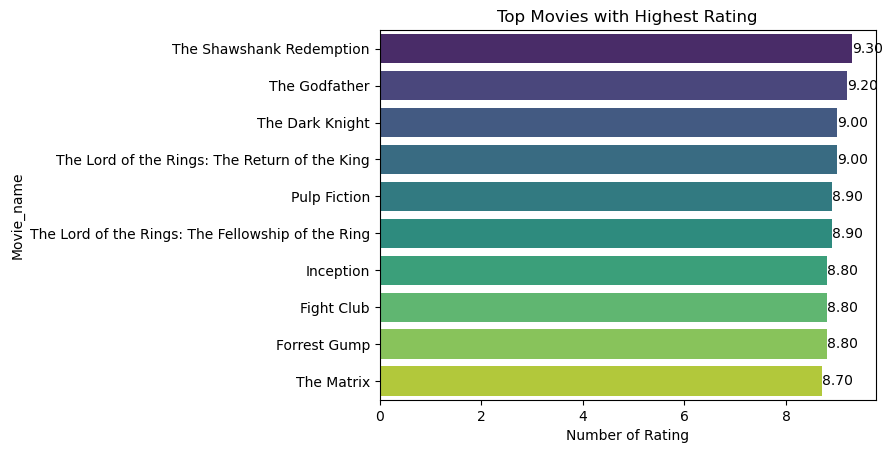

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Rating'
films_by_rating = films_by_rating.sort_values('Rating', ascending=False)

# Create a horizontal bar plot using seaborn
ax = sns.barplot(x='Rating', y='Movie_name', data=films_by_rating, palette='viridis')

# Annotate each bar with its value
for i, value in enumerate(films_by_rating['Rating']):
    ax.text(value, i, f'{value:.2f}', va='center')

# Show the plot
plt.title('Top Movies with Highest Rating')
plt.xlabel('Number of Rating')
plt.show()

Insight:- From the above bar graph we come to know that "The Shawshank Redemption" is highly rated movie among the 5000 movie.

# Top 10 Movies According to Votes¶

In [55]:
# Assuming 'votes' is the column you want to convert
movie_df['Votes'] = pd.to_numeric(movie_df['Votes'].str.replace(',', ''), errors='coerce').astype('Int64')

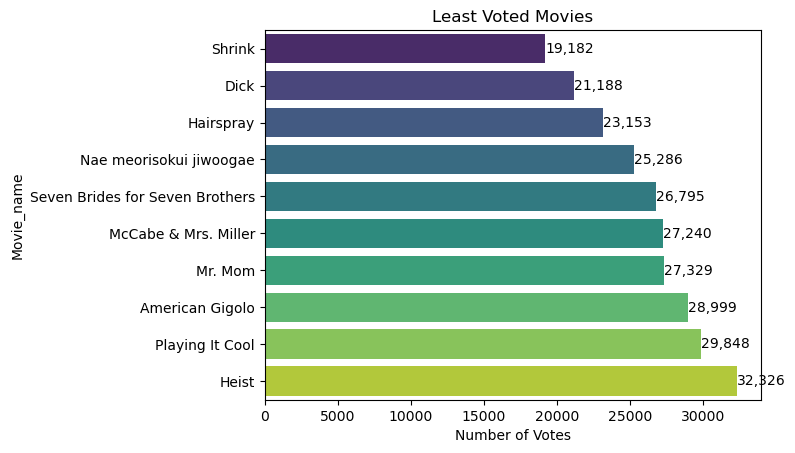

In [56]:
# Assuming imdb1 is your DataFrame
films_by_votes = movie_df[['Movie_name', 'Votes']] \
                    .rename(columns={'Votes': 'Votes'}) \
                    .tail(10)

# Sort by 'Number of votes' in ascending order for better visibility
films_by_votes = films_by_votes.sort_values('Votes', ascending=True)

# Create a horizontal bar plot using seaborn
ax = sns.barplot(x='Votes', y='Movie_name', data=films_by_votes, palette='viridis')

# Annotate each bar with its value
for i, value in enumerate(films_by_votes['Votes']):
    ax.text(value, i, f'{value:,}', ha='left', va='center', fontsize=10, color='black')

plt.title('Least Voted Movies')
plt.xlabel('Number of Votes')
plt.show()

Insight:- From the above bar graph we come to know that "The Thomas Crown Affair" & "Jessabelle" is zero voted movie and "The Promotion" is least voted with "19522" votes among the 5000 movie.

# Movies of particular director as per votes

In [57]:
import matplotlib.pyplot as plt

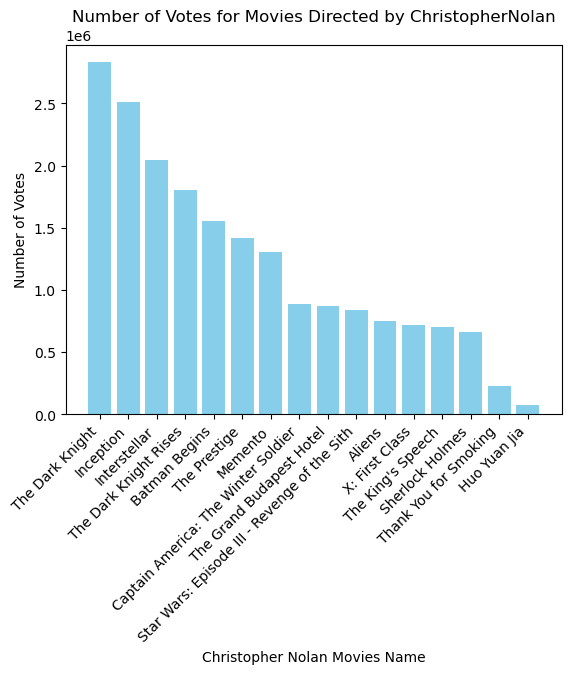

In [58]:
# Replace 'Director_Name' with the name of the director you want to visualize
director_name = 'ChristopherNolan'

# Filter the DataFrame for the specific director
director_movies = movie_df[movie_df['directors'] == director_name]

# Sort the movies by the number of votes in descending order
director_movies = director_movies.sort_values(by='Votes', ascending=False)

# Create a bar plot
plt.bar(director_movies['Movie_name'], director_movies['Votes'], color='skyblue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')


# Set labels and title
plt.xlabel('Christopher Nolan Movies Name')
plt.ylabel('Number of Votes')
plt.title(f"Number of Votes for Movies Directed by {director_name}")

# Show the plot
plt.show()


Insight:- From the above bar graph we come to know that the director Christopher Nolan movie The Dark knight having maximum voted among all movie directed by him among the 5000 movie.

# Rating by certificate

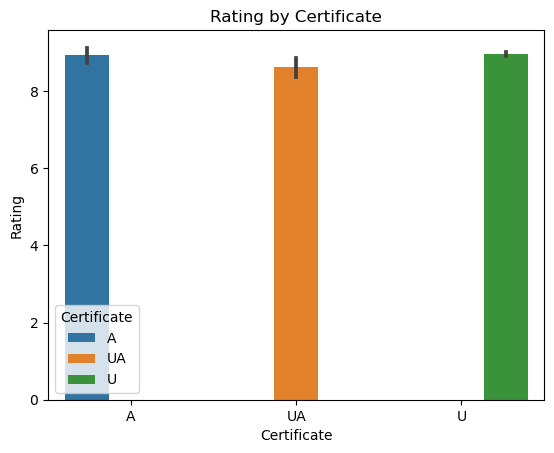

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming films_by_certificate is your DataFrame
films_by_certificate = movie_df[['Certificate', 'Rating']].head(15)
# Convert 'Rating' to numeric
films_by_certificate['Rating'] = pd.to_numeric(films_by_certificate['Rating'], errors='coerce')

# Create a bar plot
sns.barplot(x='Certificate', y='Rating', data=films_by_certificate, hue='Certificate')

# Set labels and title
plt.xlabel('Certificate')
plt.ylabel('Rating')
plt.title('Rating by Certificate')

# Show the plot
plt.show()

Insight:- From the above bar graph we come to know that the group of star TimRobbins,MorganFreeman,BobGunton,William sadler having highest rating among the 5000 movie.

# Plotting average rating by director

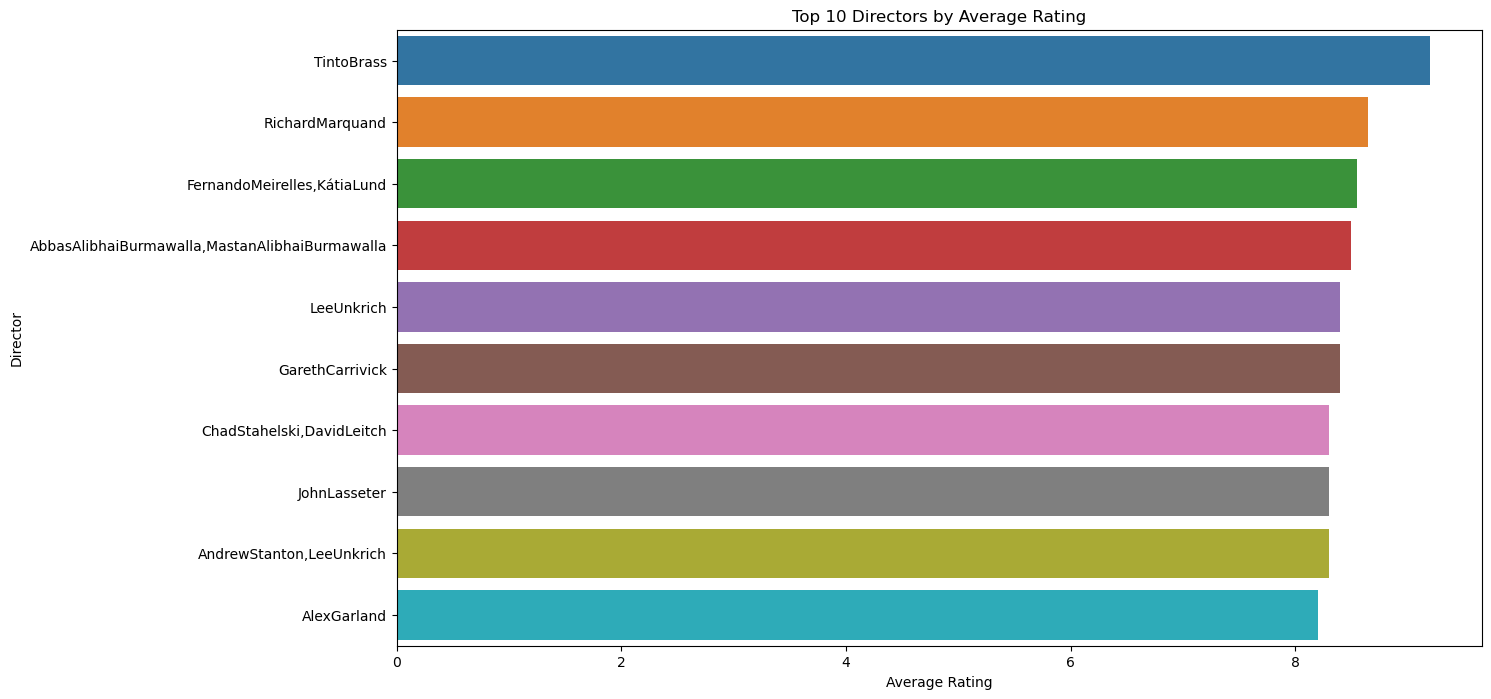

In [60]:
import pandas as pd

# Assuming 'movie_df' is your DataFrame
# Remove non-numeric characters from 'Rating'
movie_df['Rating'] = movie_df['Rating'].replace('[^\d.]', '', regex=True)

# Convert 'Rating' to numeric
movie_df['Rating'] = pd.to_numeric(movie_df['Rating'], errors='coerce')

# Group by 'directors' and calculate the mean of 'Rating'
director_rating_data = movie_df.groupby('directors')['Rating'].mean().reset_index()

# Plotting average rating by director
plt.figure(figsize=(14, 8))
sns.barplot(x='Rating', y='directors', data=director_rating_data.sort_values(by='Rating', ascending=False).head(10))
plt.title('Top 10 Directors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.show()

Insight:- From the above bar graph we come to know that ErtemEgilmez having highest rating among the directors among the 5000 movie.

In [61]:
imdb = movie_df

# For Vectoraization Combine Categorical column

In [62]:
imdb['tags'] = movie_df['Genre'] + '.'+ movie_df['Description'] + movie_df['directors'] + '.'+ movie_df['stars']

In [63]:
imdb1 = imdb[['Movie_name','Year','Rating','Metascore','Certificate','Gross_income','Votes','Runtime','tags']]
imdb1

,Movie_name,Year,Rating,Metascore,Certificate,Gross_income,Votes,Runtime,tags
0,The Shawshank Redemption,1994,9.3,82,A,$28.34M,2848373,142,"Drama.Over the course of several years, two co..."
1,The Dark Knight,2008,9.0,84,UA,$534.86M,2829747,152,"Action, Crime, Drama.When the menace known as ..."
2,Inception,2010,8.8,74,UA,$292.58M,2512239,148,"Action, Adventure, Sci-Fi.A thief who steals c..."
3,Fight Club,1999,8.8,67,A,$37.03M,2283738,139,Drama.An insomniac office worker and a devil-m...
4,Pulp Fiction,1994,8.9,95,A,$107.93M,2186365,154,"Crime, Drama.The lives of two mob hitmen, a bo..."
...,...,...,...,...,...,...,...,...,...
4995,Seven Brides for Seven Brothers,1954,7.3,75,Certificate not available,$9.40M,26795,102,"Musical, Romance, Western.In 1850 Oregon, when..."
4996,Playing It Cool,2014,5.9,30,R,Gross not available,29848,94,"Comedy, Romance.Unrequited love motivates a gu..."
4997,Nae meorisokui jiwoogae,2004,8.1,Metascore not available,Certificate not available,Gross not available,25286,117,"Drama, Romance.A young couple's enduring love ..."
4998,Hairspray,1988,7.0,77,U,$6.67M,23153,92,"Comedy, Drama, Family.A 'pleasantly plump' tee..."


In [64]:
# Convert list into String
imdb1['tags'] = imdb1['tags'].apply(lambda x: "".join(x) if isinstance(x, list) else x)

C:\Users\Kavya\AppData\Local\Temp\ipykernel_10368\497168642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb1['tags'] = imdb1['tags'].apply(lambda x: "".join(x) if isinstance(x, list) else x)


In [65]:
imdb1['tags'][0]

'Drama.Over the course of several years, two convicts form a friendship, seeking consolation and, eventually, redemption through basic compassion.FrankDarabont.TimRobbins,MorganFreeman,BobGunton,WilliamSadler'

# TEXT VECTORIZATION

CountVectorizer is a feature extraction method in the scikit-learn library (sklearn) that converts a collection of text documents to a matrix of token counts. PorterStemmer:- The PorterStemmer is a stemming algorithm designed to remove the suffixes (prefixes in some cases) of words to obtain their root form, or stem.

WordNetLemmatizer:-The WordNetLemmatizer, on the other hand, to get the base or dictionary form of a word, called the lemma.

In [66]:
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
import re

In [67]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [68]:
# Stemming of tags:
def stem(text):
    y = []
    
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)


In [69]:
imdb1['tags'][0]

'Drama.Over the course of several years, two convicts form a friendship, seeking consolation and, eventually, redemption through basic compassion.FrankDarabont.TimRobbins,MorganFreeman,BobGunton,WilliamSadler'

In [70]:
stem('Drama.Over the course of several years, two convicts form a friendship, seeking consolation and, eventually, redemption through basic compassion.FrankDarabont.TimRobbins,MorganFreeman,BobGunton,WilliamSadler')

'drama.ov the cours of sever years, two convict form a friendship, seek consol and, eventually, redempt through basic compassion.frankdarabont.timrobbins,morganfreeman,bobgunton,williamsadl'

In [71]:
imdb1['tags'] = imdb1['tags'].fillna('').astype(str)

C:\Users\Kavya\AppData\Local\Temp\ipykernel_10368\1520009078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb1['tags'] = imdb1['tags'].fillna('').astype(str)


In [72]:
imdb1['tags'] = imdb1['tags'].apply(stem)

C:\Users\Kavya\AppData\Local\Temp\ipykernel_10368\275265868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb1['tags'] = imdb1['tags'].apply(stem)


primary purpose of CountVectorizer is to convert a collection of text documents to a matrix of token counts.

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [74]:
movies_data = imdb1['tags'].fillna('').astype(str)

In [75]:
vectors = cv.fit_transform(movies_data).toarray()

In [76]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [77]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
feature_names = cv.get_feature_names_out()

In [79]:
feature_names

array(['000', '10', '100', ..., 'zombies', 'zoo', 'zooeydeschanel'],
      dtype=object)

# Cosine Similarity For find out the near by vector

Similarity is invers of distance range 0 to 1
if similarity is 1 then similarity vector is similar is high similarity is 0 then vector is not similar and less similarity

In [80]:
from sklearn.metrics.pairwise import cosine_similarity

In [81]:
similarity = cosine_similarity(vectors)

In [82]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]# this show the similarity of first movie with all movies.For holding the index value we use enumarate function

[(4675, 0.24019223070763074),
 (2802, 0.22188007849009167),
 (1207, 0.21483446221182984),
 (1525, 0.21483446221182984),
 (2209, 0.21483446221182984)]

# Steps in recommended function

In [83]:
def recommend(movie):
    movie_index = imdb1[imdb1['Movie_name']== movie].index[0] # to find out the index of given movie 
    distances = similarity[movie_index] # Calculate the distance of vector
    movie_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    
    for i in movie_list:
        print(imdb1.iloc[i[0]].Movie_name)
        #print(i[0])# this will print only index no. of recommanded movie

In [84]:
print('The Top 5 Recommended Movie is :- ')
recommend('The Dark Knight')

The Top 5 Recommended Movie is :- 
Batman Begins
Star Wars: Episode III - Revenge of the Sith
Undisputed III: Redemption
Batman Returns
Punisher: War Zone


In [85]:
imdb1.iloc[2581].Movie_name# use for printing the name of movie

'The Sweetest Thing'

In [95]:
import pickle

In [96]:
pickle.dump(imdb1,open('movies.pkl','wb'))

In [97]:
pickle.dump(similarity,open('similarity.pkl','wb'))

In [98]:
imdb1

,Movie_name,Year,Rating,Metascore,Certificate,Gross_income,Votes,Runtime,tags
0,The Shawshank Redemption,1994,9.3,82,A,$28.34M,2848373,142,"drama.ov the cours of sever years, two convict..."
1,The Dark Knight,2008,9.0,84,UA,$534.86M,2829747,152,"action, crime, drama.when the menac known as t..."
2,Inception,2010,8.8,74,UA,$292.58M,2512239,148,"action, adventure, sci-fi.a thief who steal co..."
3,Fight Club,1999,8.8,67,A,$37.03M,2283738,139,drama.an insomniac offic worker and a devil-ma...
4,Pulp Fiction,1994,8.9,95,A,$107.93M,2186365,154,"crime, drama.th live of two mob hitmen, a boxe..."
...,...,...,...,...,...,...,...,...,...
4995,Seven Brides for Seven Brothers,1954,7.3,75,Certificate not available,$9.40M,26795,102,"musical, romance, western.in 1850 oregon, when..."
4996,Playing It Cool,2014,5.9,30,R,Gross not available,29848,94,"comedy, romance.unrequit love motiv a guy to w..."
4997,Nae meorisokui jiwoogae,2004,8.1,Metascore not available,Certificate not available,Gross not available,25286,117,"drama, romance.a young couple' endur love is t..."
4998,Hairspray,1988,7.0,77,U,$6.67M,23153,92,"comedy, drama, family.a 'pleasantli plump' tee..."


In [93]:
!python --version



Python 3.11.4


In [94]:
import sys
print(sys.version)


3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
